In [1]:
import sys
sys.path.append('../../../../impacts_tools/src')

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from impacts_tools import p3

%matplotlib inline

In [2]:
fname_p3 = (
    '/home/disk/bob/impacts/microphysics/20220217/'
    'IMPACTS-MetNav_P3B_20220217_RA.ict'
)
p3nav = p3.P3(fname_p3, '2022-02-17')
p3nav.data

<xarray.Dataset>
Dimensions:      (time: 29815)
Coordinates:
  * time         (time) datetime64[ns] 2022-02-17T16:33:21 ... 2022-02-18T00:...
Data variables: (12/35)
    lon          (time) float64 -75.45 -75.45 -75.45 ... -75.47 -75.47 -75.47
    lat          (time) float64 37.95 37.95 37.95 37.95 ... 37.93 37.93 37.93
    alt_gps      (time) float64 -26.9 -27.0 -27.0 -27.0 ... -22.7 -22.7 -22.7
    alt_pres     (time) float64 -240.0 -245.0 -247.0 -243.0 ... 70.0 71.0 71.0
    alt_radar    (time) float64 1.7 1.7 0.8 2.6 1.2 1.7 ... 4.1 4.0 3.7 4.0 3.7
    grnd_spd     (time) float64 0.03 0.53 1.6 3.56 5.92 ... 0.0 0.0 0.0 0.0 0.0
    ...           ...
    svp_ice      (time) float64 22.65 22.36 22.15 21.78 ... 13.51 13.51 13.51
    rh           (time) float64 49.97 52.1 53.56 52.15 ... 77.49 77.06 77.27
    zenith       (time) float64 50.8 50.8 50.8 50.8 ... 115.5 115.5 115.5 115.5
    sun_elev_P3  (time) float64 39.4 39.4 39.4 39.5 ... -24.4 -24.4 -24.4 -24.4
    sun_az       (time) float64 166.2 166.2 166.2 166.2 ... -85.0 -85.0 -85.0
    sun_az_P3    (time) float64 -47.0 -47.3 -47.0 -46.9 ... 61.4 61.4 61.4 61.4
Attributes: (12/27)
    Experiment:           IMPACTS
    Platform:             Wallops P-3 N426NA
    Mission PI:           Lynn McMurdie (lynnm@uw.edu)
    PI_CONTACT_INFO:      Melissa Yang Martin, m.yang@baeri.org
    LOCATION:             Included in data records
    ASSOCIATED_DATA:      This flight represents IMPACTS Science Flight #9 ou...
    ...                   ...
    PROJECT_INFO:         See IMPACTS site on ESPO website.
    STIPULATIONS_ON_USE:  Please contact PI or DM with questions.
    OTHER_COMMENTS:        Potential temperature derived from static air temp...
    REVISION:             RA
    RA:                   Preliminary field data with minimal QC. Limits of d...
    INSTRUMENT_INFO_9:    ime_Start,Day_Of_Year,Latitude,Longitude,GPS_Altitu...

In [3]:
date = '2022-02-17'
p3nav_avg = p3.P3(
    fname_p3, date, start_time=f'{date}T16:35:00', end_time='2022-02-18T00:50:00',
    tres='5S'
)
p3nav_avg.data

<xarray.Dataset>
Dimensions:      (time: 5940)
Coordinates:
  * time         (time) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-18T00:...
Data variables: (12/35)
    lon          (time) float64 -75.51 -75.51 -75.52 ... -75.47 -75.47 -75.47
    lat          (time) float64 37.92 37.92 37.92 37.92 ... 37.93 37.93 37.93
    alt_gps      (time) float64 402.3 427.1 456.9 483.1 ... -22.72 -22.7 -22.7
    alt_pres     (time) float64 1.101e+03 1.177e+03 1.277e+03 ... 69.6 69.8 68.8
    alt_radar    (time) float64 1.367e+03 1.467e+03 1.517e+03 ... 3.68 3.8 3.86
    grnd_spd     (time) float64 87.08 89.56 91.4 93.6 ... 0.002 0.002 0.002 0.0
    ...           ...
    svp_ice      (time) float64 18.43 18.36 18.35 18.23 ... 13.52 13.5 13.51
    rh           (time) float64 58.11 57.34 55.84 55.29 ... 77.69 77.67 77.65
    zenith       (time) float64 50.7 50.7 50.7 50.7 ... 115.4 115.4 115.4 115.5
    sun_elev_P3  (time) float64 37.78 38.6 38.86 38.92 ... -24.3 -24.3 -24.36
    sun_az       (time) float64 166.7 166.7 166.7 166.7 ... -85.1 -85.1 -85.1
    sun_az_P3    (time) float64 -89.44 -89.92 -90.22 -90.44 ... 61.4 61.4 61.4
Attributes: (12/27)
    Experiment:           IMPACTS
    Platform:             Wallops P-3 N426NA
    Mission PI:           Lynn McMurdie (lynnm@uw.edu)
    PI_CONTACT_INFO:      Melissa Yang Martin, m.yang@baeri.org
    LOCATION:             Included in data records
    ASSOCIATED_DATA:      This flight represents IMPACTS Science Flight #9 ou...
    ...                   ...
    PROJECT_INFO:         See IMPACTS site on ESPO website.
    STIPULATIONS_ON_USE:  Please contact PI or DM with questions.
    OTHER_COMMENTS:        Potential temperature derived from static air temp...
    REVISION:             RA
    RA:                   Preliminary field data with minimal QC. Limits of d...
    INSTRUMENT_INFO_9:    ime_Start,Day_Of_Year,Latitude,Longitude,GPS_Altitu...

Compare the 1 Hz and 5-s averaged data for a few vars.

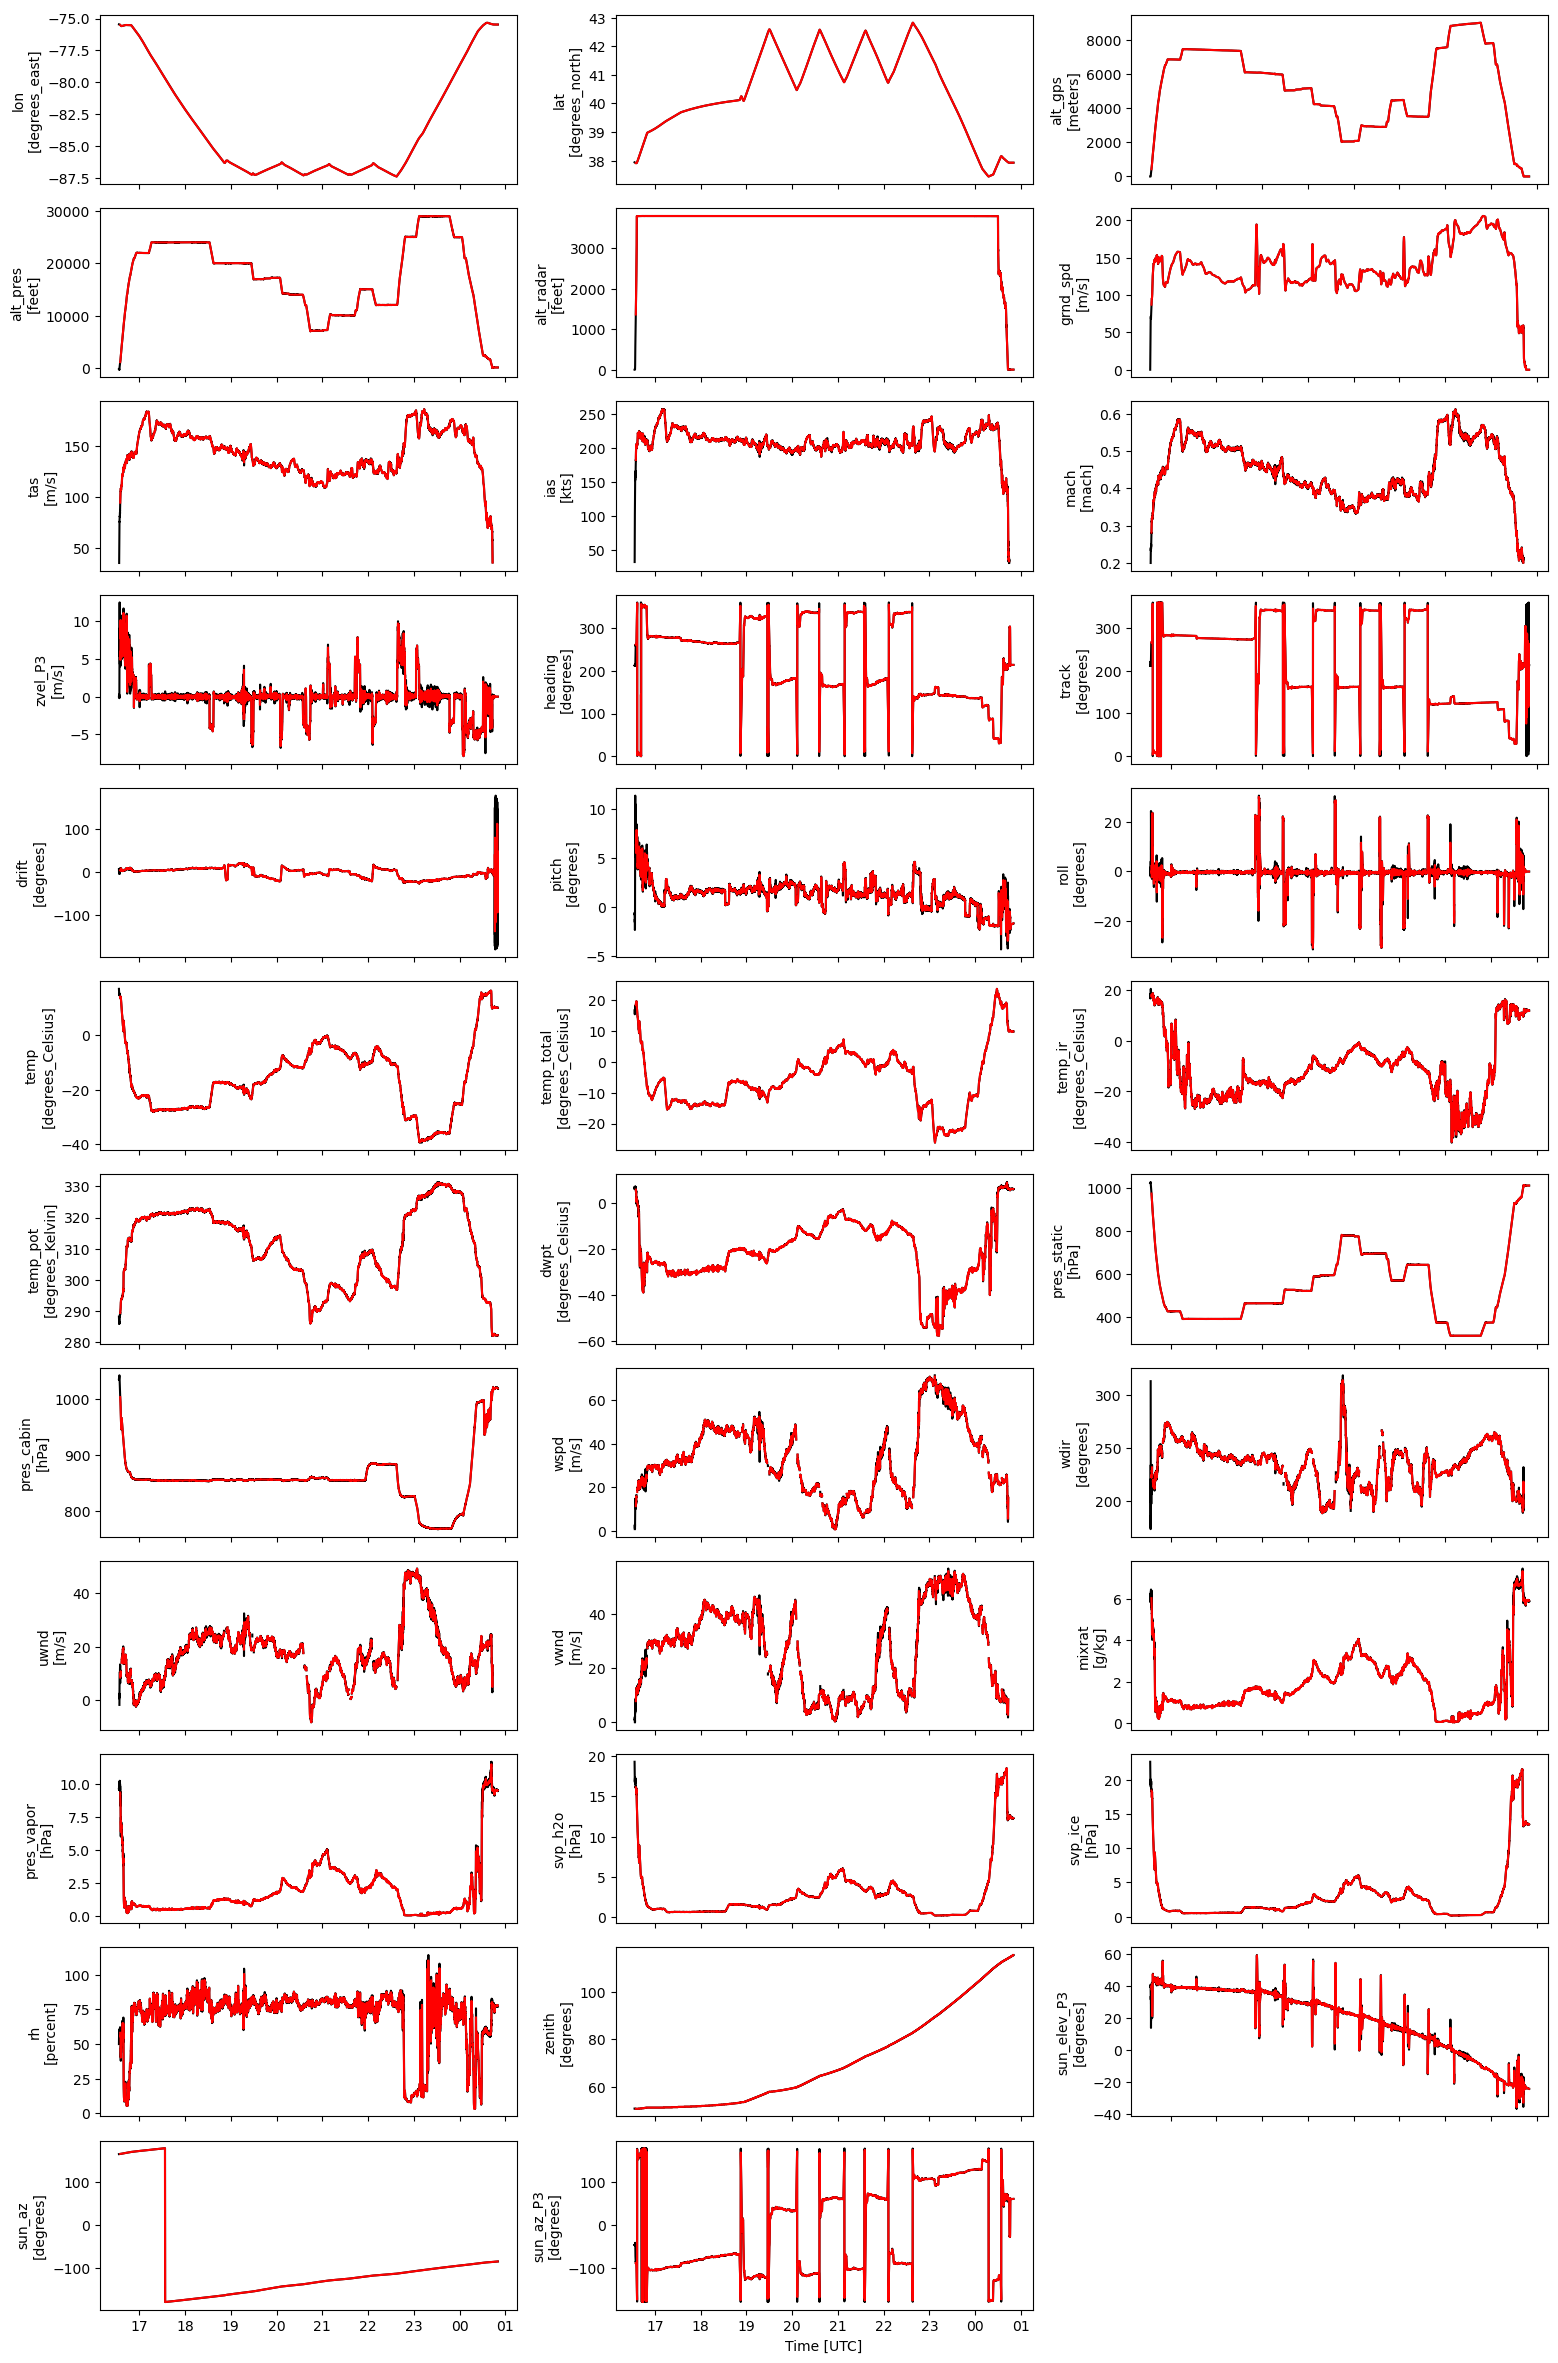

In [4]:
fig, axs = plt.subplots(nrows=12, ncols=3, sharex=True, figsize=(16, 24))
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

for i, var in enumerate(list(p3nav.data.data_vars)):
    ax = axs[i // 3, int(np.mod(i, 3))]
    ax.plot(p3nav.data['time'], p3nav.data[var], 'k-')
    ax.plot(p3nav_avg.data['time'], p3nav_avg.data[var], 'r-')
    ax.set_ylabel(f'{var}\n[{p3nav.data[var].attrs["units"]}]')
axs[-1, -1].axis('off')

plt.xlim(p3nav_avg.data['time'][0], p3nav_avg.data['time'][-1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xlabel('Time [UTC]')
plt.tight_layout()
plt.show()

---
## TAMMS

In [5]:
def parse_header(f, date):
        '''
        NLHEAD : Number of header lines
        FFI : NASA AMES FFI format number
        ONAME : Originator/PI Name
        ORG : Name of organization
        SNAME : Instrument/platform name
        MNAME : Project/mission name
        IVOL : Current volume number (almost always 1)
        NVOL : Number of volumes for data (almost always 1)
        DATE : YYYY MM DD UTC begin date
        RDATE : Reduction/revision UTC date
        DX : Interval between successive values (data rate)
        XNAME : Name/Description of DX variable above
        NV : Number of primary variables in file
        VSCL : Scaling factor for each variable column
        VMISS : Missing value for each variable column
        VNAME : Name of first variable
        NSCOML : Number of special comment lines within header
        SCOM : Special comments about file/data, etc.
        NNCOML : Number of normal comment lines within header
        NCOM : Normal comments
        '''
        hdr = {}
        hdr['NLHEAD'], hdr['FFI'] = f.readline().rstrip('\n').split(',')

        # Check that the file is indeed NASA AMES 1001
        if hdr['FFI'].replace(' ', '') != '1001':
            print("Check file type, looks like it's not FFI 1001")
            return

        hdr['ONAME'] = f.readline().rstrip('\n')
        hdr['ORG'] = f.readline().rstrip('\n')
        hdr['SNAME'] = f.readline().rstrip('\n')
        hdr['MNAME'] = f.readline().rstrip('\n')
        hdr['IVOL'], hdr['NVOL'] = f.readline().rstrip('\n').split(',')
        yy1, mm1, dd1, yy2, mm2, dd2 = f.readline().split(',')
        hdr['DATE'] = (int(yy1), int(mm1), int(dd1))
        hdr['RDATE'] = (int(yy2), int(mm2), int(dd2))
        hdr['DX'] = f.readline().rstrip('\n')
        hdr['XNAME'] = f.readline().rstrip('\n')
        hdr['NV'] = int(f.readline().rstrip('\n'))
        vscl = f.readline().split(',')
        hdr['VSCAL'] = [float(x) for x in vscl]
        vmiss = f.readline().split(',')
        hdr['VMISS'] = [float(x) for x in vmiss]
        hdr['VNAME'] = ['time']
        hdr['VUNIT'] = ['seconds since ' + date]
        for nvar in range(hdr['NV']):
            line_buffer = f.readline().rstrip('\n').split(',', 1)
            hdr['VNAME'].append(line_buffer[0])
            hdr['VUNIT'].append(line_buffer[1][1:])
        hdr['NSCOML'] = int(f.readline().rstrip('\n'))
        hdr['SCOM'] = []
        for nscom in range(hdr['NSCOML']):
            hdr['SCOM'].append(f.readline().rstrip('\n'))
        hdr['NNCOML'] = int(f.readline().rstrip('\n'))
        hdr['NCOM'] = []
        for nncom in range(hdr['NNCOML']):
            hdr['NCOM'].append(f.readline().rstrip('\n'))
        # Insert elements to account for time column
        hdr['VSCAL'].insert(0, 1)
        hdr['VMISS'].insert(0, np.nan)
        f.close()

        return hdr

In [6]:
date = '2022-02-17'
file_tamms = (
    '/home/disk/bob/impacts/microphysics/20220217/'
    'IMPACTS_TAMMS_P3_20220217_R0.ict'
)
header = parse_header(open(file_tamms, 'r'), date)

In [7]:
header

{'NLHEAD': '47',
 'FFI': '1001',
 'ONAME': 'Thornhill, Lee',
 'ORG': 'NASA Langley',
 'SNAME': 'Fast in-situ 3-D wind and temperature measurements from the NASA P-3',
 'MNAME': 'IMPACTS',
 'IVOL': '1',
 'NVOL': '1',
 'DATE': (2022, 2, 17),
 'RDATE': (2022, 8, 8),
 'DX': '0.05',
 'XNAME': 'Time_mid,Secs after midnight,Time of acquisition',
 'NV': 10,
 'VSCAL': [1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'VMISS': [nan,
  -9999.0,
  -9999.0,
  -9999.0,
  -9999.0,
  -9999.0,
  -9999.0,
  -9999.0,
  -9999.0,
  -9999.0,
  -9999.0],
 'VNAME': ['time',
  'Latitude_deg',
  'Longitude_deg',
  'PALT_ft',
  'GPS_alt_m',
  'Pitch_deg',
  'Roll_deg',
  'Tstat_degC',
  'WSPD_ms-1',
  'WDIR_deg',
  'w_ms-1'],
 'VUNIT': ['seconds since 2022-02-17',
  'deg, Platform_Latitude_insitu_None',
  'deg, Platform_Longitude_insitu_None',
  't, Platform_AltitudePressure_InSitu_None',
  ', Platform_AltitudePressure_InSitu_None',
  'deg, Platform_PitchAngle_insitu_None',
  'deg, Platform_RollAngle_insit

In [8]:
data_raw = np.genfromtxt(
    file_tamms, delimiter=',', skip_header=int(header['NLHEAD']),
    missing_values=header['VMISS'], usemask=True, filling_values=np.nan
)

In [9]:
readfile = {}
for jj, unit in enumerate(header['VUNIT']):
    header['VUNIT'][jj] = unit.split(',')[0]
for jj, name in enumerate(header['VNAME']):
    readfile[name] = np.array(data_raw[:, jj] * header['VSCAL'][jj])
    readfile[name][readfile[name]==header['VMISS'][jj]] = np.nan

In [10]:
header['VNAME']

['time',
 'Latitude_deg',
 'Longitude_deg',
 'PALT_ft',
 'GPS_alt_m',
 'Pitch_deg',
 'Roll_deg',
 'Tstat_degC',
 'WSPD_ms-1',
 'WDIR_deg',
 'w_ms-1']

In [11]:
sec_frac, sec = np.modf(readfile['time'])
time = np.array([
    np.datetime64(date) + np.timedelta64(int(sec[i]), 's') + np.timedelta64(int(np.round(1000. * sec_frac[i])), 'ms')
    for i in range(len(readfile['time']))], dtype='datetime64[ms]'
)

In [12]:
time

array(['2022-02-17T16:33:54.000', '2022-02-17T16:33:54.050',
       '2022-02-17T16:33:54.100', ..., '2022-02-18T00:42:57.800',
       '2022-02-18T00:42:57.850', '2022-02-18T00:42:57.900'],
      dtype='datetime64[ms]')

In [13]:
# populate data arrays
lat = xr.DataArray(
    data = np.ma.masked_invalid(readfile['Latitude_deg']),
    dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Aircraft latitude',
        units='degrees_north')
)
lon = xr.DataArray(
    data = np.ma.masked_invalid(readfile['Longitude_deg']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Aircraft longitude',
        units='degrees_east')
)
alt_gps = xr.DataArray(
    data = np.ma.masked_invalid(readfile['GPS_alt_m']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Aircraft GPS altitude (mean sea level)',
        units='meters')
)
alt_pres = xr.DataArray(
    data = np.ma.masked_invalid(readfile['PALT_ft']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Aircraft pressure altitude',
        units='feet')
)
pitch = xr.DataArray(
    data = np.ma.masked_invalid(readfile['Pitch_deg']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Aircraft pitch angle (positive is up)',
        units='degrees')
)
roll = xr.DataArray(
    data = np.ma.masked_invalid(readfile['Roll_deg']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Aircraft roll angle (positive is right turn)',
        units='degrees')
)
t = xr.DataArray(
    data = np.ma.masked_invalid(readfile['Tstat_degC']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Static (ambient) air temperature',
        units='degrees_Celsius')
)
wspd = xr.DataArray(
    data = np.ma.masked_invalid(readfile['WSPD_ms-1']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Horizontal wind speed',
        units='m/s')
)
wdir = xr.DataArray(
    data = np.ma.masked_invalid(readfile['WDIR_deg']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Horizontal wind direction (clockwise from +y)',
        units='degrees')
)
wwnd = xr.DataArray(
    data = np.ma.masked_invalid(readfile['w_ms-1']), dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Vertical component wind speed',
        units='m/s')
)

In [14]:
wdir_math = wdir - 270. # convert to math-relative dirction
wdir_math[wdir_math < 0.] += 360.

In [16]:
uwnd = xr.DataArray(
    data = np.ma.masked_invalid(wspd * np.cos(np.deg2rad(wdir_math))),
    dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Horizontal U-component wind speed',
        units='m/s')
)
vwnd = xr.DataArray(
    data = np.ma.masked_invalid(wspd * np.sin(np.deg2rad(wdir_math))),
    dims = ['time_raw'],
    coords = dict(time_raw = time),
    attrs = dict(
        description='Horizontal V-component wind speed',
        units='m/s')
)

In [17]:
ds = xr.Dataset(
    data_vars={
        'lon_raw': lon,
        'lat_raw': lat,
        'alt_gps_raw': alt_gps,
        'alt_pres_raw': alt_pres,
        'pitch_raw': pitch,
        'roll_raw': roll,
        'temp_raw': t,
        'wspd_raw': wspd,
        'wdir_raw': wdir,
        'uwnd_raw': uwnd,
        'vwnd_raw': vwnd,
        'wwnd_raw': wwnd
    },
    coords={
        'time_raw': time
    }
)
ds

<xarray.Dataset>
Dimensions:       (time_raw: 586879)
Coordinates:
  * time_raw      (time_raw) datetime64[ns] 2022-02-17T16:33:54 ... 2022-02-1...
Data variables:
    lon_raw       (time_raw) float64 -75.43 -75.43 -75.43 ... -75.31 -75.31
    lat_raw       (time_raw) float64 37.99 37.99 37.99 ... 37.99 37.99 37.99
    alt_gps_raw   (time_raw) float64 14.82 14.82 14.82 ... 14.55 14.55 14.55
    alt_pres_raw  (time_raw) float64 -326.8 -328.5 -326.8 ... -10.75 -7.0 -5.25
    pitch_raw     (time_raw) float64 -1.83 -1.75 -1.65 -1.55 ... 0.09 0.03 -0.01
    roll_raw      (time_raw) float64 0.01 0.02 0.03 0.06 ... 0.07 0.09 0.21 0.36
    temp_raw      (time_raw) float64 16.22 16.18 16.26 ... 11.36 11.26 11.27
    wspd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    wdir_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    uwnd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    vwnd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    wwnd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan

In [18]:
td = pd.to_timedelta(ds['time_raw'][1].values - ds['time_raw'][0].values)
td

Timedelta('0 days 00:00:00.050000')

In [85]:
dummy_times.asfreq()

AttributeError: 'Dataset' object has no attribute 'asfreq'

In [86]:
time_pd = pd.date_range(
    start=p3nav_avg.data['time'][0].values,
    end=end_time, freq=td
)
time_pd

DatetimeIndex([       '2022-02-17 16:35:00', '2022-02-17 16:35:00.050000',
               '2022-02-17 16:35:00.100000', '2022-02-17 16:35:00.150000',
               '2022-02-17 16:35:00.200000', '2022-02-17 16:35:00.250000',
               '2022-02-17 16:35:00.300000', '2022-02-17 16:35:00.350000',
               '2022-02-17 16:35:00.400000', '2022-02-17 16:35:00.450000',
               ...
               '2022-02-18 00:49:54.500000', '2022-02-18 00:49:54.550000',
               '2022-02-18 00:49:54.600000', '2022-02-18 00:49:54.650000',
               '2022-02-18 00:49:54.700000', '2022-02-18 00:49:54.750000',
               '2022-02-18 00:49:54.800000', '2022-02-18 00:49:54.850000',
               '2022-02-18 00:49:54.900000', '2022-02-18 00:49:54.950000'],
              dtype='datetime64[ns]', length=593900, freq='50L')

In [92]:
time_pd.freqstr

'50L'

In [34]:
td_p3 = pd.to_timedelta(
    p3nav_avg.data['time'][1].values - p3nav_avg.data['time'][0].values
) # P-3 Met-Nav timedelta
if td_p3 == pd.Timedelta(1, 's'):
    end_time = p3nav_avg.data['time'][-1].values
else:
    end_time = p3nav_avg.data['time'][-1].values - td
dummy_times = xr.Dataset(
    coords={
        'time_raw': pd.date_range(
            start=p3nav_avg.data['time'][0].values,
            end=end_time, freq=td)
    }
)
#start_time = '2022-02-17T16:33:21.000000000'
#end_time = '2022-02-18T00:50:15.000000000'
# dummy_times = xr.Dataset(
#     coords={
#         'time_raw': pd.date_range(start=start_time, end=end_time, freq=td)
#     }
# )
dummy_times

<xarray.Dataset>
Dimensions:   (time_raw: 593900)
Coordinates:
  * time_raw  (time_raw) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-18T00...
Data variables:
    *empty*

In [53]:
# ds_new = ds.interp_like(dummy_times)
ds = ds.interp_like(dummy_times)
ds

<xarray.Dataset>
Dimensions:       (time_raw: 593900)
Coordinates:
  * time_raw      (time_raw) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-1...
Data variables:
    lon_raw       (time_raw) float64 -75.47 -75.47 -75.47 -75.47 ... nan nan nan
    lat_raw       (time_raw) float64 37.98 37.98 37.98 37.98 ... nan nan nan nan
    alt_gps_raw   (time_raw) float64 426.1 426.1 426.1 426.1 ... nan nan nan nan
    alt_pres_raw  (time_raw) float64 1.026e+03 1.03e+03 1.031e+03 ... nan nan
    pitch_raw     (time_raw) float64 6.51 6.5 6.48 6.47 6.45 ... nan nan nan nan
    roll_raw      (time_raw) float64 -0.0 0.07 0.19 0.33 ... nan nan nan nan
    temp_raw      (time_raw) float64 15.35 15.31 15.2 15.17 ... nan nan nan nan
    wspd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    wdir_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    uwnd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    vwnd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan
    wwnd_raw      (time_raw) float64 nan nan nan nan nan ... nan nan nan nan nan

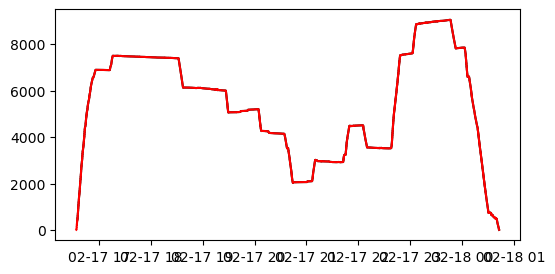

In [36]:
fig = plt.figure(figsize=(6, 3))

ax = fig.add_subplot(111)
ax.plot(ds_new['time_raw'], ds_new['alt_gps_raw'], 'k-')
ax.plot(ds['time_raw'], ds['alt_gps_raw'], 'r-')

In [65]:
sum(~np.isnan(ds['wwnd_raw'].resample(time_raw='5S').mean()))

<xarray.DataArray 'wwnd_raw' ()>
array(3728)
Coordinates:
    time_raw  datetime64[ns] 2022-02-18T00:49:50

In [73]:
np.ma.masked_invalid(ds['wwnd_raw'].resample(time_raw='5S').std(skipna=False))

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20)

In [74]:
wwnd_std = xr.DataArray(
    data = np.ma.masked_invalid(
        ds['wwnd_raw'].resample(time_raw='5S').std(
            skipna=False, keep_attrs=True)
    ),
    dims = ['time'], coords = dict(time = ds_new['time']),
    attrs = dict(
        description='Standard deviation of the vertical component wind speed',
        units='m/s'
    )
)
wwnd_std

<xarray.DataArray (time: 5939)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-18T00:49:50
Attributes:
    description:  Standard deviation of the vertical component wind speed
    units:        m/s

In [54]:
ds_new = ds.resample(time_raw='5S').mean(skipna=True, keep_attrs=True)
ds_new = ds_new.rename_dims(dims_dict={'time_raw': 'time'})

name_dict = {'time_raw': 'time'}
for var in list(ds_new.data_vars):
    name_dict[var] = var.split('_raw')[0]
ds_new = ds_new.rename(name_dict=name_dict)
ds_new

<xarray.Dataset>
Dimensions:   (time: 5939)
Coordinates:
  * time      (time) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-18T00:49:50
Data variables:
    lon       (time) float64 -75.48 -75.48 -75.49 -75.49 ... nan nan nan nan
    lat       (time) float64 37.98 37.97 37.97 37.97 37.97 ... nan nan nan nan
    alt_gps   (time) float64 438.1 462.9 491.6 519.1 549.2 ... nan nan nan nan
    alt_pres  (time) float64 1.078e+03 1.154e+03 1.251e+03 ... nan nan nan
    pitch     (time) float64 5.942 6.08 5.476 5.454 6.477 ... nan nan nan nan
    roll      (time) float64 2.272 -0.0163 0.0336 0.0695 ... nan nan nan nan
    temp      (time) float64 15.11 15.15 15.13 14.77 14.6 ... nan nan nan nan
    wspd      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    wdir      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    uwnd      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    vwnd      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
    wwnd      (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

In [55]:
ds2 = xr.merge([ds, ds_new])
ds2

<xarray.Dataset>
Dimensions:       (time_raw: 593900, time: 5939)
Coordinates:
  * time_raw      (time_raw) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-1...
  * time          (time) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-18T00...
Data variables: (12/24)
    lon_raw       (time_raw) float64 -75.47 -75.47 -75.47 -75.47 ... nan nan nan
    lat_raw       (time_raw) float64 37.98 37.98 37.98 37.98 ... nan nan nan nan
    alt_gps_raw   (time_raw) float64 426.1 426.1 426.1 426.1 ... nan nan nan nan
    alt_pres_raw  (time_raw) float64 1.026e+03 1.03e+03 1.031e+03 ... nan nan
    pitch_raw     (time_raw) float64 6.51 6.5 6.48 6.47 6.45 ... nan nan nan nan
    roll_raw      (time_raw) float64 -0.0 0.07 0.19 0.33 ... nan nan nan nan
    ...            ...
    temp          (time) float64 15.11 15.15 15.13 14.77 ... nan nan nan nan
    wspd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    wdir          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    uwnd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    vwnd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    wwnd          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [56]:
ds2['temp_raw'][:100]

<xarray.DataArray 'temp_raw' (time_raw: 100)>
array([15.35, 15.31, 15.2 , 15.17, 15.21, 15.18, 15.11, 15.04, 15.01,
       15.08, 15.04, 14.97, 14.95, 14.96, 15.04, 15.2 , 15.27, 15.27,
       15.22, 15.14, 15.18, 15.18, 15.22, 15.26, 15.23, 15.1 , 15.04,
       14.96, 14.96, 14.97, 15.04, 15.01, 15.11, 15.08, 15.02, 14.98,
       15.08, 15.06, 15.03, 14.96, 15.03, 15.03, 14.99, 14.94, 14.94,
       14.98, 14.99, 14.91, 14.88, 14.89, 14.88, 14.89, 14.87, 14.86,
       14.89, 14.94, 14.91, 14.88, 14.77, 14.72, 14.74, 15.03, 15.27,
       15.14, 15.18, 15.15, 15.09, 15.01, 14.97, 15.12, 15.13, 15.2 ,
       15.25, 15.22, 15.29, 15.3 , 15.28, 15.28, 15.27, 15.27, 15.26,
       15.25, 15.27, 15.27, 15.25, 15.25, 15.24, 15.25, 15.26, 15.26,
       15.27, 15.26, 15.25, 15.25, 15.23, 15.25, 15.25, 15.25, 15.24,
       15.26])
Coordinates:
  * time_raw  (time_raw) datetime64[ns] 2022-02-17T16:35:00 ... 2022-02-17T16...
Attributes:
    description:  Static (ambient) air temperature
    units:        degrees_Celsius

In [57]:
ds2['temp'][0]

<xarray.DataArray 'temp' ()>
array(15.1064)
Coordinates:
    time     datetime64[ns] 2022-02-17T16:35:00
Attributes:
    description:  Static (ambient) air temperature
    units:        degrees_Celsius

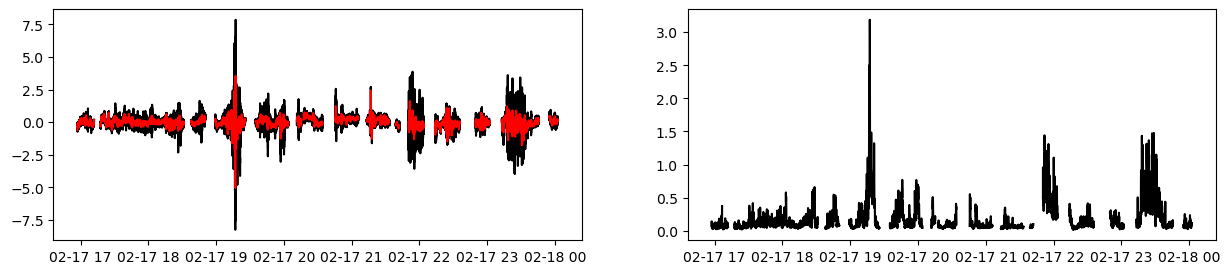

In [78]:
fig = plt.figure(figsize=(15, 3))

ax = fig.add_subplot(121)
ax.plot(ds2['time_raw'], ds2['wwnd_raw'], 'k-')
ax.plot(ds2['time'], ds2['wwnd'], 'r-')

ax = fig.add_subplot(122)
ax.plot(wwnd_std['time'], wwnd_std, 'k-')

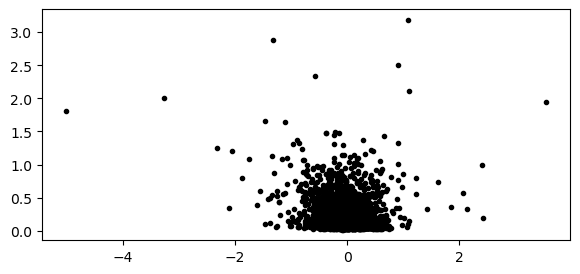

In [80]:
fig = plt.figure(figsize=(15, 3))

ax = fig.add_subplot(121)
ax.scatter(ds2['wwnd'], wwnd_std, c='k', s=9)